In [4]:
import sys
import json
import datetime
import logging
import os
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from os import listdir
from os.path import isfile, join
%matplotlib inline

In [5]:
def convert_to_digit(text):
    if text.isdigit():
        return float(text)
    else:
        return text
    
def sort_filenames(filename_list):
    filename_list.sort(key=lambda key: [convert_to_digit(c) for c in re.split('([-+]?[0-9]*\.?[0-9]*)', key)])
    return filename_list

In [6]:
def sweep_directory(directory, token=None):
    files = []
    for f in listdir(directory):
        file = join(directory, f)
        if (isfile(file) and token in file):
            files.append(file)
    return sort_filenames(files)

In [7]:
train_files = sweep_directory("/mnt/data/datasets/N-Caltech101/event_based_icarl", "train.npy")
test_files = sweep_directory("/mnt/data/datasets/N-Caltech101/event_based_icarl", "test.npy")

/home/iulialexandra/anaconda3/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


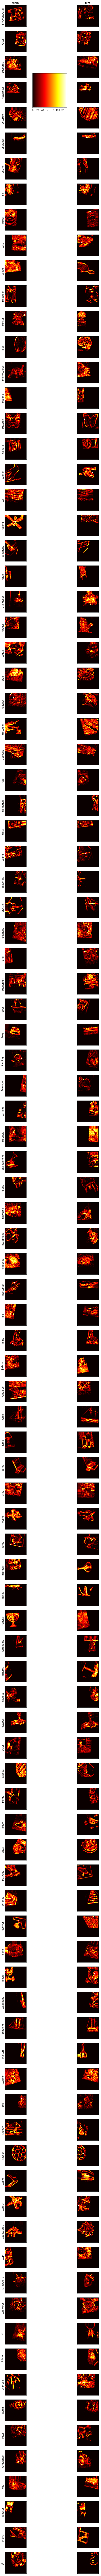

In [8]:
cols = 2
rows = len(train_files)
image_num = 20
fig, axes = plt.subplots(rows, cols, figsize=(10, 200))
for idx, (train_file, test_file) in enumerate(zip(train_files, test_files)):
    train_npy = np.load(train_file)
    test_npy = np.load(test_file)
    train_im = axes[idx, 0].imshow(np.squeeze(train_npy[image_num]), cmap="hot")
    axes[0, 0].set_title("train")
    test_im = axes[idx, 1].imshow(np.squeeze(test_npy[image_num]), cmap="hot")
    axes[0, 1].set_title("test")
    axes[idx, 0].set_xticks([])
    axes[idx, 0].set_yticks([])
    axes[idx, 1].set_xticks([])
    axes[idx, 1].set_yticks([])
    cls = train_file.split("/")[-1].split("_")[0]
    axes[idx, 0].set_ylabel(cls)
cax = fig.add_axes([0.4, 0.85, 0.2, 0.01])
fig.colorbar(train_im, cax=cax, orientation="horizontal")
plt.savefig("roshambo_samples_1.png")
